In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("data/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
data.head().T

,0,1,2,3,4
Age,41,49,37,33,27
Attrition,Yes,No,Yes,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,1,8,2,3,2
Education,2,1,2,4,1
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
EmployeeCount,1,1,1,1,1
EmployeeNumber,1,2,4,5,7


In [5]:
data.shape

(1470, 35)

In [6]:
# are there null columns
data.isnull().all().all()

False

In [6]:
len(data.select_dtypes(include='O').columns)

9

## Baseline Modelling with Basic Preprocessing

In [7]:
def numericalise(df):
    df = df.copy()
    for col in df.select_dtypes(include='O').columns:
        df[col] = df[col].astype("category").cat.codes
    return df

In [8]:
data_numericalised = numericalise(data)
data_numericalised.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


## Basic Understanding of Correlation. 

None of the variables have very high correlation with the target vector, there is possible collinearity, this - however - is the basic baseline model - so that will be ignored for now.

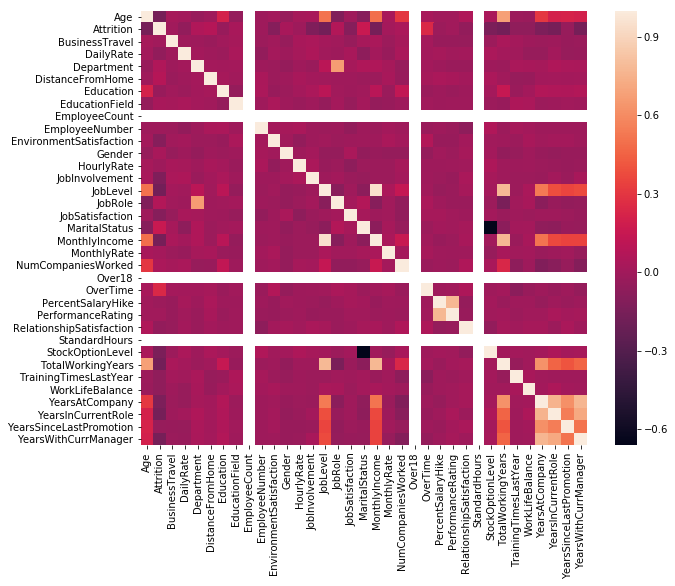

In [9]:
import seaborn
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))


seaborn.heatmap(data_numericalised.corr())

## Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
log_regression_obj = LogisticRegression()

In [12]:
target = data_numericalised.Attrition.copy()
features = data_numericalised.drop('Attrition', axis=1).copy()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42)

In [15]:
model = log_regression_obj.fit(X_train, y_train)

C:\Users\Neilpc\anaconda3\envs\pytorchenv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
model.score(X_train, y_train)

0.8666061705989111

In [17]:
model.score(X_test, y_test)

0.8913043478260869

## Log Regression with PCA

Note that while PCA here lowered model accuracy on this dummy Kaggle data, it enhanced the model on the actual data

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA()

In [21]:
pca_obj = pca.fit(X_train)

In [22]:
pca_X_train = pca_obj.transform(X_train)
pca_X_test  = pca_obj.transform(X_test)

In [53]:
log_reg_obj2 = 

pca_linear_model = linear_obj_2.fit(pca_X_train, y_train)
pca_linear_model.score(X_train, y_train)

-1162596.1677733562

Linear Discriminant Analysis and Logistic Regression

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()

something_else = lda.fit(X_train, y_train)

In [58]:
lda_X_train = something_else.transform(X_train)

In [59]:
lda_X_test = something_else.transform(X_test)

In [61]:
linear_obj_3 = LinearRegression()

linear_lda_model = linear_obj_3.fit(lda_X_train, y_train)
linear_lda_model.score(lda_X_train, y_train)

0.2365228528137734